# Vector Autoregression
Forecasting on all searches together,
adapted from https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(42)

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.stats.stattools import durbin_watson

In [10]:
combined_states = pd.read_csv(f'../data/combined_states.csv', parse_dates=['week'], index_col='week')
combined_states.head()

,depression,anxiety,addiction,counselling,mental_health,stay_at_home,mask_mandate,gatherings_banned,business_closures,travel_restrictions
week,,,,,,,,,,
2017-12-31,50.4,60.9,23.8,30.0,18.7,0.0,0.0,0.0,0.0,0.0
2018-01-07,57.1,62.3,23.3,32.6,27.0,0.0,0.0,0.0,0.0,0.0
2018-01-14,53.7,59.1,22.5,36.6,29.6,0.0,0.0,0.0,0.0,0.0
2018-01-21,63.6,63.4,23.2,36.2,28.2,0.0,0.0,0.0,0.0,0.0
2018-01-28,61.3,62.3,23.6,36.0,25.6,0.0,0.0,0.0,0.0,0.0


In [11]:
combined_states = combined_states[['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']]
combined_states.head()

,depression,anxiety,addiction,counselling,mental_health
week,,,,,
2017-12-31,50.4,60.9,23.8,30.0,18.7
2018-01-07,57.1,62.3,23.3,32.6,27.0
2018-01-14,53.7,59.1,22.5,36.6,29.6
2018-01-21,63.6,63.4,23.2,36.2,28.2
2018-01-28,61.3,62.3,23.6,36.0,25.6


In [12]:
# Split the data to train and test
nobs = 15
df_train, df_test = combined_states[0:-nobs], combined_states[-nobs:]

# Check size and split
print(df_train.shape)  
print(df_test.shape)  
df_train.tail()

(247, 5)
(15, 5)


,depression,anxiety,addiction,counselling,mental_health
week,,,,,
2022-08-21,40.5,73.1,18.6,34.9,46.6
2022-08-28,42.7,67.7,20.6,36.4,44.1
2022-09-04,42.5,66.9,20.2,36.2,42.4
2022-09-11,47.6,69.1,20.2,35.7,43.5
2022-09-18,59.7,70.1,22.0,34.5,49.5


In [13]:
df_test.head()

,depression,anxiety,addiction,counselling,mental_health
week,,,,,
2022-09-25,51.4,67.2,20.2,34.2,50.0
2022-10-02,53.4,73.1,23.8,38.3,52.7
2022-10-09,49.1,74.7,21.3,40.4,58.4
2022-10-16,46.1,71.9,20.1,35.4,49.2
2022-10-23,51.5,72.9,22.1,35.2,50.7


---

## Choose the Lag for the model

In [14]:
model = VAR(df_train, freq='W-SUN')
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  12.380339963460584
BIC :  12.80781941906209
FPE :  238086.26507584823
HQIC:  12.552466059283045 

Lag Order = 2
AIC :  12.213463543473743
BIC :  12.999460284616438
FPE :  201544.52369908668
HQIC:  12.52998375359296 

Lag Order = 3
AIC :  12.201737224627776
BIC :  13.348349757510793
FPE :  199322.52691920332
HQIC:  12.663529415788306 

Lag Order = 4
AIC :  12.23113455005487
BIC :  13.740482087300785
FPE :  205519.38216199641
HQIC:  12.839085189604944 

Lag Order = 5
AIC :  12.270158435899342
BIC :  14.144381181355413
FPE :  214126.26315217974
HQIC:  13.025162706630597 

Lag Order = 6
AIC :  12.303248903605589
BIC :  14.544508342157668
FPE :  221995.97444432153
HQIC:  13.206210820516532 

Lag Order = 7
AIC :  12.415189448262186
BIC :  15.025668640768679
FPE :  249345.2615603456
HQIC:  13.467021977283713 

Lag Order = 8
AIC :  12.491464492730909
BIC :  15.473368376186809
FPE :  270653.9058679836
HQIC:  13.693089671453052 

Lag Order = 9
AIC :  12.562890122853922
BIC :

In [15]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,15.11,15.19,3.664e+06,15.14
1,12.42,12.86*,2.485e+05,12.60
2,12.25,13.06,2.089e+05,12.58*
3,12.25*,13.43,2.088e+05*,12.72
4,12.26,13.80,2.111e+05,12.88
5,12.29,14.21,2.189e+05,13.06
6,12.32,14.60,2.265e+05,13.24
7,12.42,15.07,2.514e+05,13.49
8,12.51,15.53,2.767e+05,13.73
9,12.58,15.97,2.994e+05,13.95


The best lag seems to be 3 or 1. I will use 3 as it has best AIC and FPE

---

## Fit and evaluate the model

In [16]:
model_fitted = model.fit(3)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 01, Feb, 2023
Time:                     21:26:02
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    13.3483
Nobs:                     244.000    HQIC:                   12.6635
Log likelihood:          -3139.72    FPE:                    199323.
AIC:                      12.2017    Det(Omega_mle):         145090.
--------------------------------------------------------------------
Results for equation depression
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    7.364326         7.399758            0.995           0.320
L1.depression            0.608845         0.072101            8.444           0.000
L1.anxiety              -0.095724         0

In [17]:
# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

out = durbin_watson(model_fitted.resid)

for col, val in zip(combined_states.columns, out):
    print(col, ':', round(val, 2))

depression : 2.03
anxiety : 2.06
addiction : 2.02
counselling : 1.98
mental_health : 2.01


'The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation.'
The values are close to 2 - no correlation

In [18]:
lag_order = model_fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = df_train.values[-4:]
forecast_input

3


array([[42.7, 67.7, 20.6, 36.4, 44.1],
       [42.5, 66.9, 20.2, 36.2, 42.4],
       [47.6, 69.1, 20.2, 35.7, 43.5],
       [59.7, 70.1, 22. , 34.5, 49.5]])

In [19]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_test.index[-nobs:], columns=df_train.columns + '_forecast')
df_forecast

,depression_forecast,anxiety_forecast,addiction_forecast,counselling_forecast,mental_health_forecast
week,,,,,
2022-09-25,55.084249,70.344270,21.114383,34.919325,45.166092
2022-10-02,52.200686,68.272576,20.722330,33.268296,43.382186
2022-10-09,51.805423,68.325892,20.761104,33.127382,42.747952
2022-10-16,51.566507,68.584753,20.749630,33.230555,42.017805
2022-10-23,50.734100,68.317293,20.578129,32.997273,41.118407
2022-10-30,50.165077,68.264001,20.484798,32.991806,40.457481
2022-11-06,49.954256,68.368640,20.447257,33.101769,40.036235
2022-11-13,49.772497,68.439631,20.398188,33.185053,39.662523
2022-11-20,49.651239,68.503486,20.360485,33.277236,39.361380


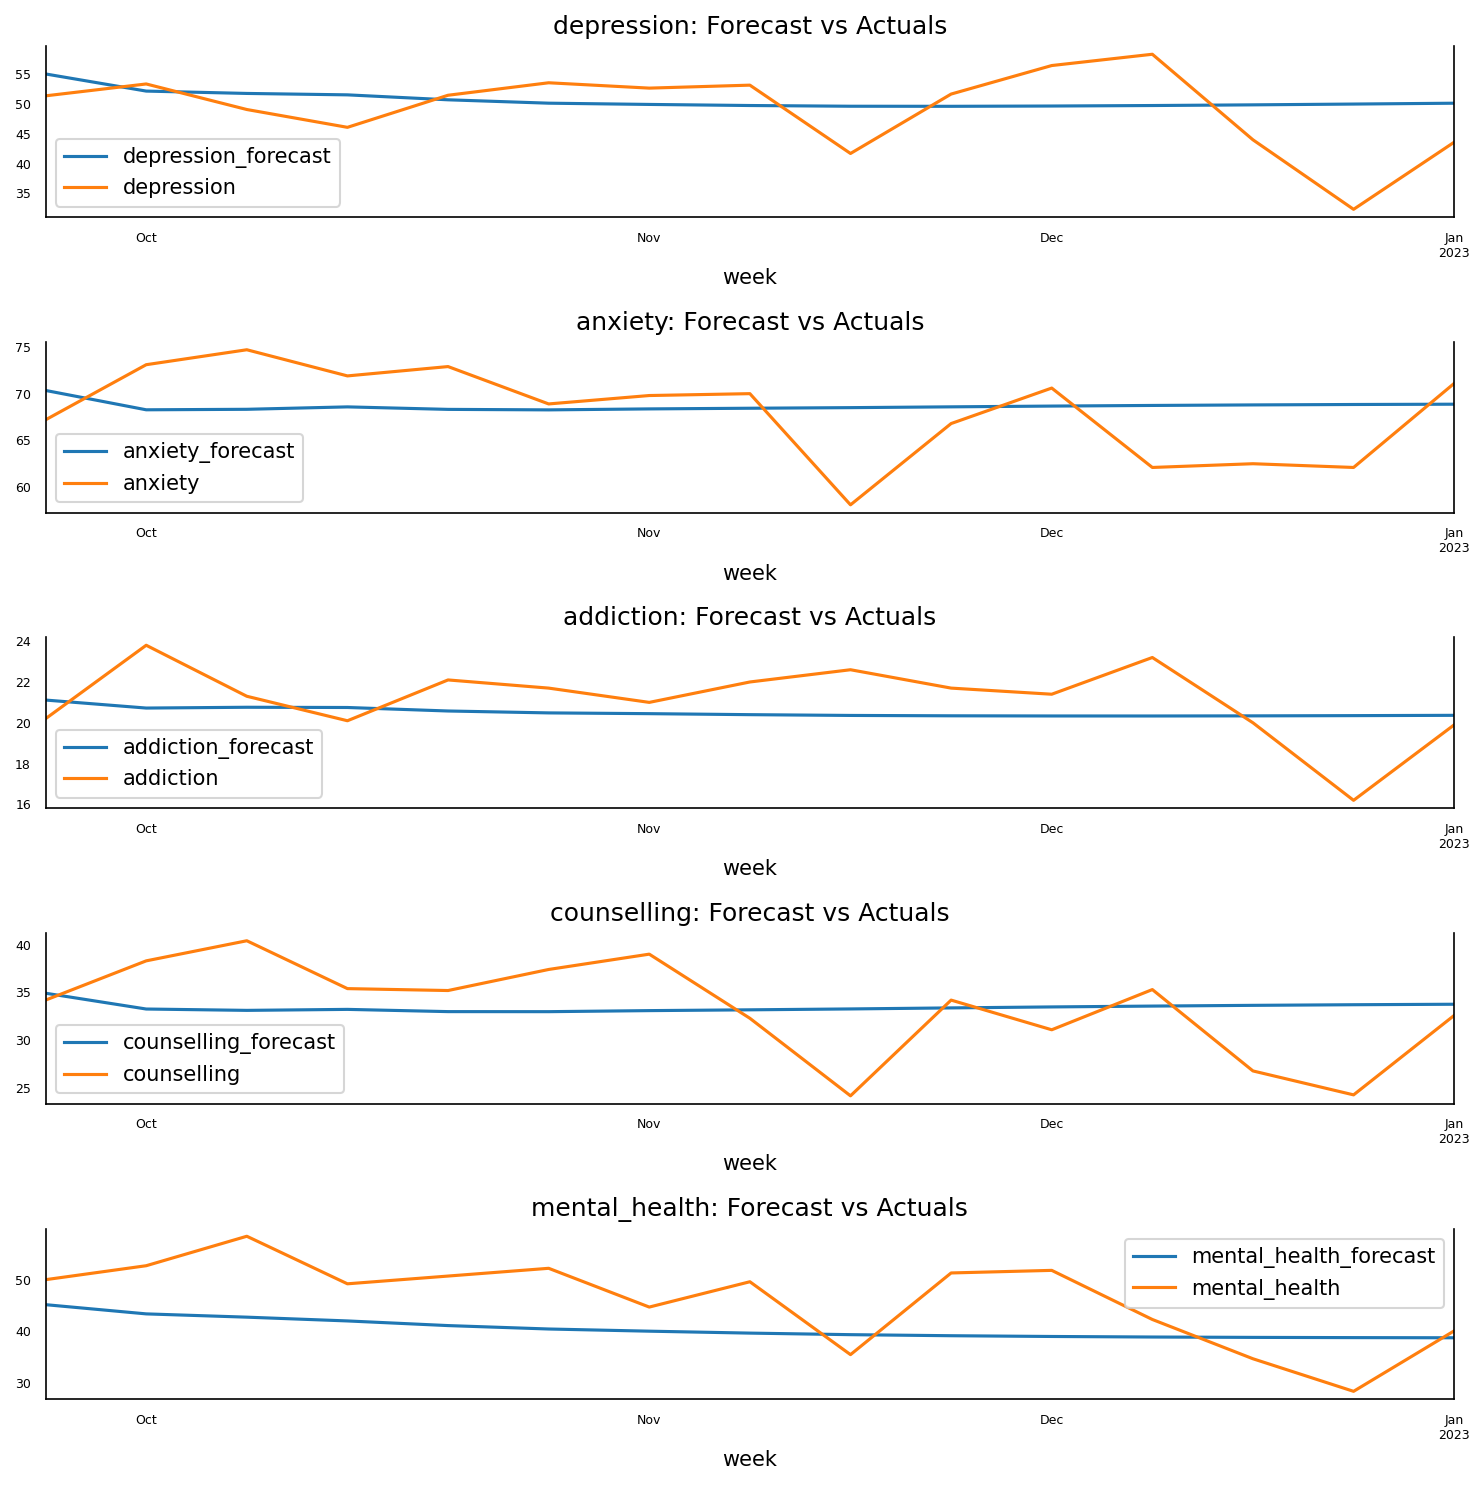

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=1, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(combined_states.columns, axes.flatten())):
    df_forecast[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Vector Autoregression did not capture the changing nature of the data. 